In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# cargar los datos
df = pd.read_csv('../../DATA/DR3/espectros_normalizados_SNGM.csv')

# separar las características (X) y la etiqueta (y)
X = df.drop('id', axis=1)
y = df['id']

# codificar la etiqueta (y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


In [2]:
df['id'].unique()

array([1, 2, 3, 4], dtype=int64)

In [3]:
# crear el modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(323, activation='relu'),
  # tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(128, activation='relu'),
  # tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(4, activation='softmax')
])

# compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [4]:
# entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
619/619 [==============================] - 3s 3ms/step - loss: 0.2867 - accuracy: 0.9004 - val_loss: 0.2446 - val_accuracy: 0.9147
Epoch 2/50
619/619 [==============================] - 2s 3ms/step - loss: 0.2268 - accuracy: 0.9223 - val_loss: 0.2162 - val_accuracy: 0.9250
Epoch 3/50
619/619 [==============================] - 2s 3ms/step - loss: 0.1909 - accuracy: 0.9368 - val_loss: 0.1701 - val_accuracy: 0.9416
Epoch 4/50
619/619 [==============================] - 2s 3ms/step - loss: 0.1528 - accuracy: 0.9532 - val_loss: 0.1615 - val_accuracy: 0.9551
Epoch 5/50
619/619 [==============================] - 2s 2ms/step - loss: 0.1381 - accuracy: 0.9567 - val_loss: 0.1460 - val_accuracy: 0.9561
Epoch 6/50
619/619 [==============================] - 2s 3ms/step - loss: 0.1246 - accuracy: 0.9628 - val_loss: 0.1519 - val_accuracy: 0.9592
Epoch 7/50
619/619 [==============================] - 2s 3ms/step - loss: 0.1201 - accuracy: 0.9634 - val_loss: 0.1236 - val_accuracy: 0.9636
Epoch 

50

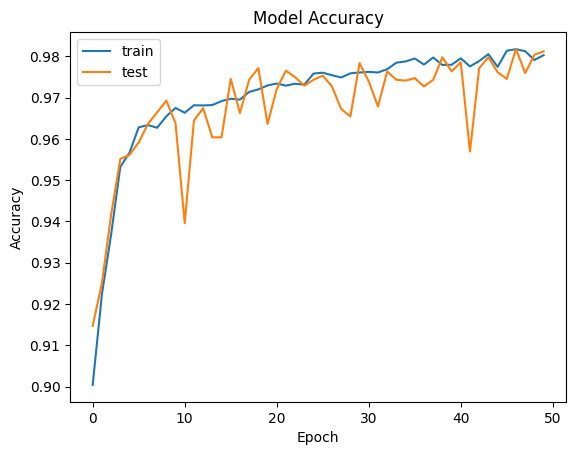

In [5]:
# graficar la precisión de entrenamiento y prueba
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix

# predecir las probabilidades para los datos de prueba
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix(y_test, y_pred)
print(cm)


155/155 [==============================] - 0s 1ms/step
[[  29    3    6    1]
 [   0   58   17   10]
 [   0    5 2393   26]
 [   0    2   23 2375]]


In [9]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     1.0000    0.7436    0.8529        39
           1     0.8529    0.6824    0.7582        85
           2     0.9811    0.9872    0.9842      2424
           3     0.9847    0.9896    0.9871      2400

    accuracy                         0.9812      4948
   macro avg     0.9547    0.8507    0.8956      4948
weighted avg     0.9808    0.9812    0.9807      4948



In [10]:
from sklearn.metrics import  accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9812045270816492


In [12]:
print("size of the splits")
print("X_train: ",  X_train.shape)
print("X_test: ",  X_test.shape)
print("y_test: ",  y_test.size)
print("y_pred: ",  y_pred.size)

size of the splits
X_train:  (19789, 343)
X_test:  (4948, 343)
y_test:  4948
y_pred:  4948
